<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Regression/Linear%20Regression%20with%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import & Install Libraries**

In [ ]:
!pip install hvplot

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

### **Import Dataset**

In [ ]:
#Import dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/All Datasets/[Machine Learning Algorithm]/Dataset Supervised Learning (Regression)/Salary_Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Check Dataset**

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
df.shape

(30, 2)

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<Axes: >

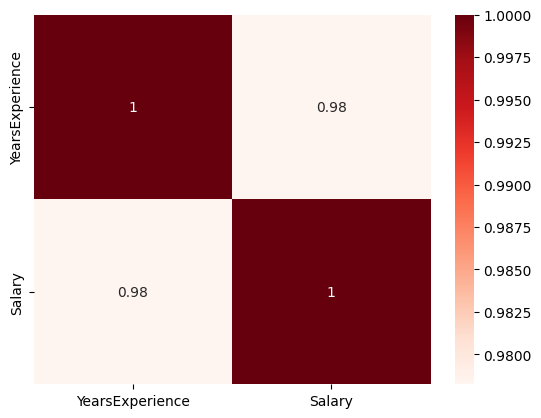

In [ ]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

### **Exploratory Data Analysis**

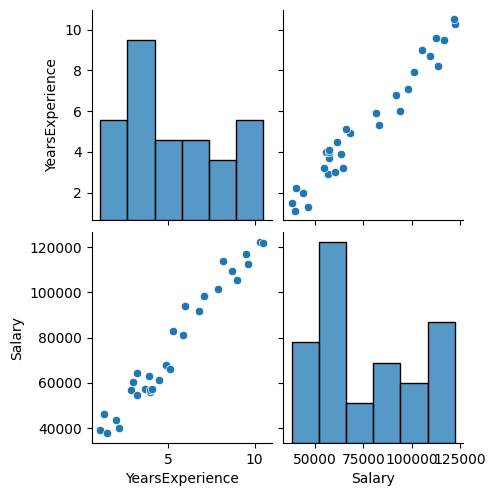

In [ ]:
sns.pairplot(df)

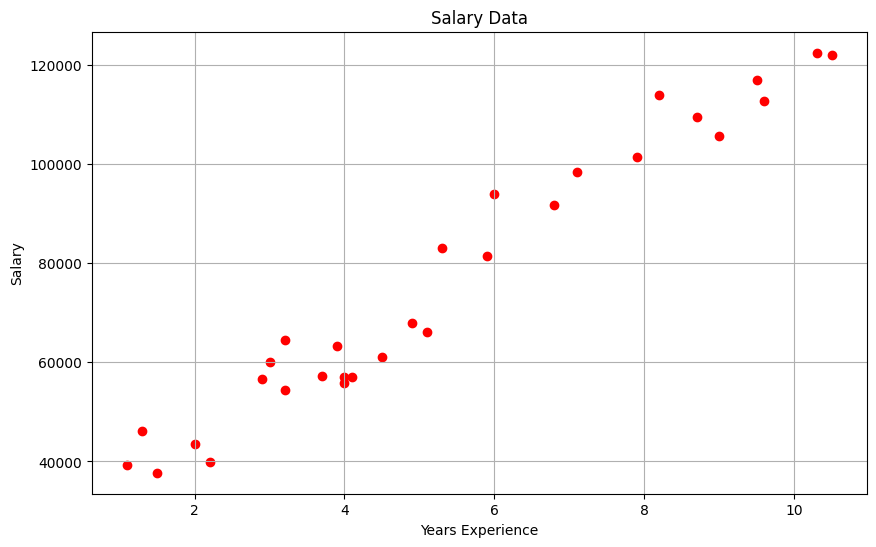

In [ ]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='red')
plt.title('Salary Data')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### **Data Preparation**

- Split the data into independent variable (X) and dependent variable (y).
- Typically, the independent variable (X) is the features used to predict the dependent variable (y).

In [ ]:
X = df[['YearsExperience']]
y = df['Salary']

### **Splitting the Data into Training and Testing Sets**

- Split the data into training and testing sets. The training data is used to train the model, while the testing data is used to evaluate the model's performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(24, 1)

In [ ]:
X_test.shape

(6, 1)

### **Creating the Model**

In [ ]:
#Creating the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Predictions from Model**

In [ ]:
#Make Predictions
y_pred = model.predict(X_test)

### **Model Evaluations**

- Berikut ini merupakan 3 evaluation metric yang umum untuk regression problem :

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

- Perbandingan 3 metrics diatas:

>- **MAE** adalah yang paling mudah untuk dipahami, karena itu adalah average error.
>- **MSE** lebih populer dari MAE, karena MSE "punishes" larger errors, yang cenderung berguna di dunia nyata.
>- **RMSE** bahkan lebih populer daripada MSE, karena RMSE dapat diinterpretasikan dalam satuan "y".


---


- Semua itu adalah **loss function**, karena ingin di minimalkan.

In [ ]:
# Calculate R-squared (R²) score
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
MSE = metrics.mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)

# Calculate Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {RMSE}")
print(f"Mean Absolute Error (MAE): {MAE}")

R-squared: 0.988169515729126
Mean Squared Error (MSE): 12823412.298126549
Root Mean Squared Error (RMSE): 3580.979237321343
Mean Absolute Error (MAE): 2446.1723690465055


### **Linear Regression Equation**


**Formula Linear Regression** : $y = b_0 + b_1 X$

$Y$ : dependent varible

$X$ : independent variable

$b_0$ : y-intercept

$b_1$ : slope

In [ ]:
# Slope
slope = model.coef_
slope

array([9312.57512673])

In [ ]:
# Intercept
intercept = model.intercept_
intercept

26780.09915062818

### **Visualizing the Results**

- Visualize the training and testing data with linear regression line.

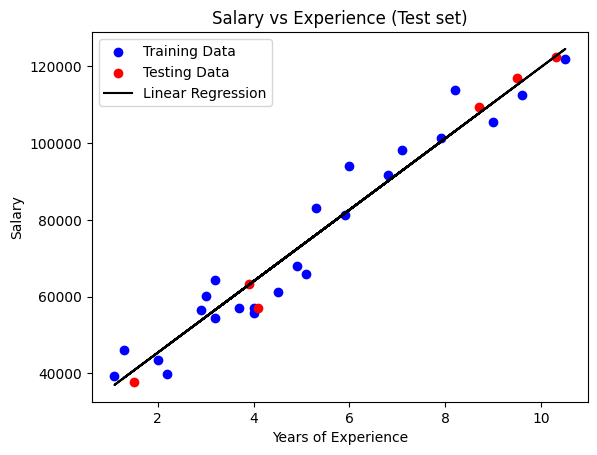

In [ ]:
# Plotting training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plotting testing data
plt.scatter(X_test, y_test, color='red', label='Testing Data')

# Plotting Linear Regressi Line
plt.plot(X_train, model.predict(X_train), color='black', label='Linear Regression')

plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


This visualization helps you see how well the linear regression line fits the data in both the training and testing sets.

### **Input New Values**

In [ ]:
# Example of new data
new_data = [[5.5], [8.9]]  # Years of experience for new data points

# Use the trained model to predict the salaries for the new data
predicted_salaries = model.predict(new_data)

# Print the predicted salaries
for years_exp, salary in zip(new_data, predicted_salaries):
    print(f"Years of Experience: {years_exp[0]} years, Predicted Salary: {salary}")


Years of Experience: 5.5 years, Predicted Salary: 77999.26234763872
Years of Experience: 8.9 years, Predicted Salary: 109662.01777851797


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
